# US Baby Names 1880–2010

## Objectives
- Visualize the proportion of babies given a particular name (your own, or another name) over time

In [6]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# load data of the names of each year from the folder 'babynames'
columns = ["name", "gender", "births"]
pieces = []
for year in range(1880, 2011):
    df = pd.read_csv(f"babynames/yob{year}.txt", names=columns)
    df["year"] = year
    pieces.append(df)

data = pd.concat(pieces, ignore_index=True)
data

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [14]:
# calculate total births for each sex in each year (using groupby)
temp1 = data.groupby(["year", "gender"])["births"].sum().reset_index()
temp1

,year,gender,births
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851
...,...,...,...
257,2008,M,2032310
258,2009,F,1827643
259,2009,M,1973359
260,2010,F,1759010


In [16]:
# calculate total births for each sex in each year (using pivote table)
temp2 = data.pivot_table(values="births", index="year", columns="gender", aggfunc="sum")
temp2

gender,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


![](births-by-sex-and-year.png)


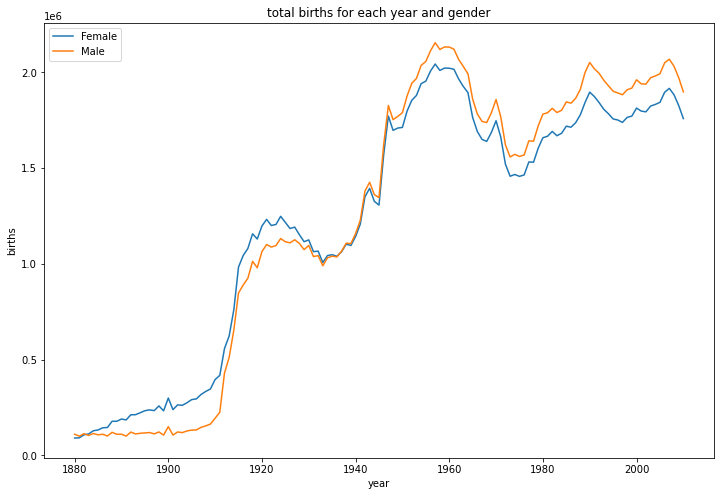

In [22]:
# draw a simmilar chart using seaborn library 
plt.figure(figsize=(12, 8))
sns.lineplot(x=temp1["year"], y=temp1["births"], hue=temp1["gender"])
plt.title("total births for each year and gender")
plt.legend(["Female", "Male"])

Text(0, 0.5, 'births')

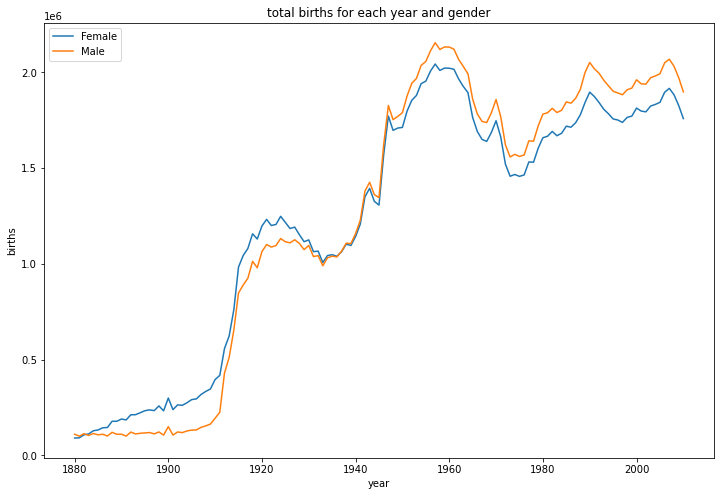

In [26]:
# draw a simmilar chart using pandas DataFRame's 'plot' method
temp2.plot(title="total births for each year and gender", figsize=(12, 8))
plt.legend(["Female", "Male"])
plt.ylabel("births")

## Independent Practice 
- load the dataset of 'movieslens'
- think of some interesting question
- draw appropriate charts to answer them